In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import fmin_l_bfgs_b
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]

In [2]:
x = np.linspace(0,2*np.pi, 100)
tic1 = np.sin(x)
tic2 = np.cos(x)

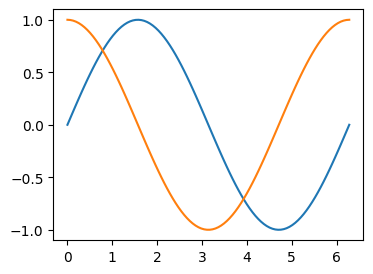

In [3]:
plt.plot(x, tic1)
plt.plot(x, tic2)

In [4]:
frame = {}
for time in range(1,100+1):
#     tic1[time-1] += 1.
#     tic2[time-1] += 1.
    data = np.array([[x[time-1], x[time-1]],[tic1[time-1], tic2[time-1]]])
    frame[time] = pd.DataFrame(data.T, index=['A', 'B'], columns=['factor', 'returns'])
frame[1]['h_privious'] = 0
frame[1]

,factor,returns,h_privious
A,0.0,0.0,0
B,0.0,1.0,0


In [11]:
def get_obj_func(h0, rAB, Lambda=0.5): 
    def obj_func(h):
        f = -np.matmul(rAB ,h) + np.sum(Lambda*(h-h0.T)**2)
        return f
    return obj_func

def get_grad_func(h0, rAB, Lambda=0.5):
    def grad_func(h):
        f_hat = -rAB + 2 * np.sum(Lambda * (h - h0.T))
        return f_hat
    return grad_func

In [12]:
h0 = frame[1]['h_privious'].values
bounds = [(0,1)]*frame[1].shape[0]
for i in range(1,100+1):
    obj_func = get_obj_func(h0, frame[i]['returns'])
    grad_func = get_grad_func(h0, frame[i]['returns'])
    h_optimal, min_val, _ = fmin_l_bfgs_b(obj_func, h0, fprime=grad_func, bounds=bounds)
    
    frame[i]['h_opt'] = h_optimal
    frame[i]['h_privious'] = h0
    h0 = h_optimal
frame[100]

,factor,returns,h_opt,h_privious
A,6.283185,-2.449294e-16,0.0,0.0
B,6.283185,1.000000e+00,1.0,1.0


In [13]:
h_optimal_list = [frame[i]['h_opt'] for i in range(1, 100+1) ]
h_optimal_list

[A    0.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    0.063424
 B    1.000000
 Name: h_opt, dtype: float64,
 A    0.190016
 B    1.000000
 Name: h_opt, dtype: float64,
 A    0.379268
 B    1.000000
 Name: h_opt, dtype: float64,
 A    0.630416
 B    1.000000
 Name: h_opt, dtype: float64,
 A    0.942449
 B    1.000000
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,
 A    1.0
 B    1.0
 Name: h_opt, dtype: float64,


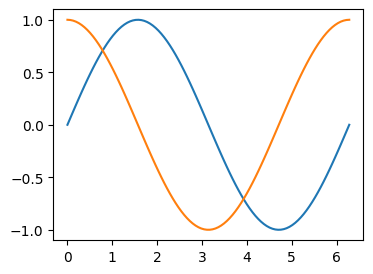

In [14]:
plt.plot(x, tic1)
plt.plot(x, tic2)

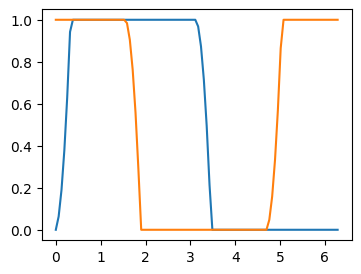

In [15]:
plt.plot(x, h_optimal_list)